### Import data

In [1]:
include("importData.jl")
include("DDEmodel.jl")
include("plot.jl")

# import data

# lapatinib
conc_l, pop_l, g2_l, g1_l, g1_0_l, g2_0_l = setup_data("lapatinib");


┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, ::Colon, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = get_data(::String, ::String) at importData.jl:29
└ @ Main /home/farnazm/dde/lapatinib/DrugResponseModel.jl/src/importData.jl:29
┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, ::Colon, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = get_data(::String, ::String) at importData.jl:37
└ @ Main /home/farnazm/dde/lapatinib/DrugResponseModel.jl/src/importData.jl:37


### Estimate 

In [2]:
# initial guess
initial_guess  = [0.0596124, 0.0331098, 0.005, 0.005]
# initial_guess = [8.870525324, 8.492087169, 0.43447323, 7.67847790]
# bounds 
# lower_bnd = [-6.0, -6.0, -10.0, -10.0]
# upper_bnd = [2.0, 2.0, 0.0, 0.0]
lower_bnd = -10.0*ones(4)
upper_bnd = 3.0*ones(4)
# bound = collect(zip(lower_bnd, upper_bnd))

# max number of steps
maxSteps = 1e4
parameters = zeros(4, 8)
for j in 1:8
    _, parameters[:, j] = optimization(g1_l, g2_l, g1_0_l, g2_0_l, initial_guess, j, lower_bnd, upper_bnd, maxSteps)
end

Starting optimization with optimizer DiffEvoOpt{FitPopulation{Float64},RadiusLimitedSelector,BlackBoxOptim.AdaptiveDiffEvoRandBin{3},RandomBound{ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps

Optimization stopped after 10001 steps and 21.96 seconds
Termination reason: Max number of steps (10000) reached
Steps per second = 455.51
Function evals per second = 459.20
Improvements/step = 0.22730
Total function evaluations = 10082


Best candidate found: [-2.62417, -3.1047, -3.98194, -10.0]

Fitness: 3854.598640997

Starting optimization with optimizer DiffEvoOpt{FitPopulation{Float64},RadiusLimitedSelector,BlackBoxOptim.AdaptiveDiffEvoRandBin{3},RandomBound{ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps

Optimization stopped after 10001 steps and 20.60 seconds
Termination reason: Max number of steps (10000) reached
Steps per second = 485.58
Function evals per second = 490.14
Improvements/step = 0.21170
Total function evaluations = 10095


Best candidate found: [-2.72152, 

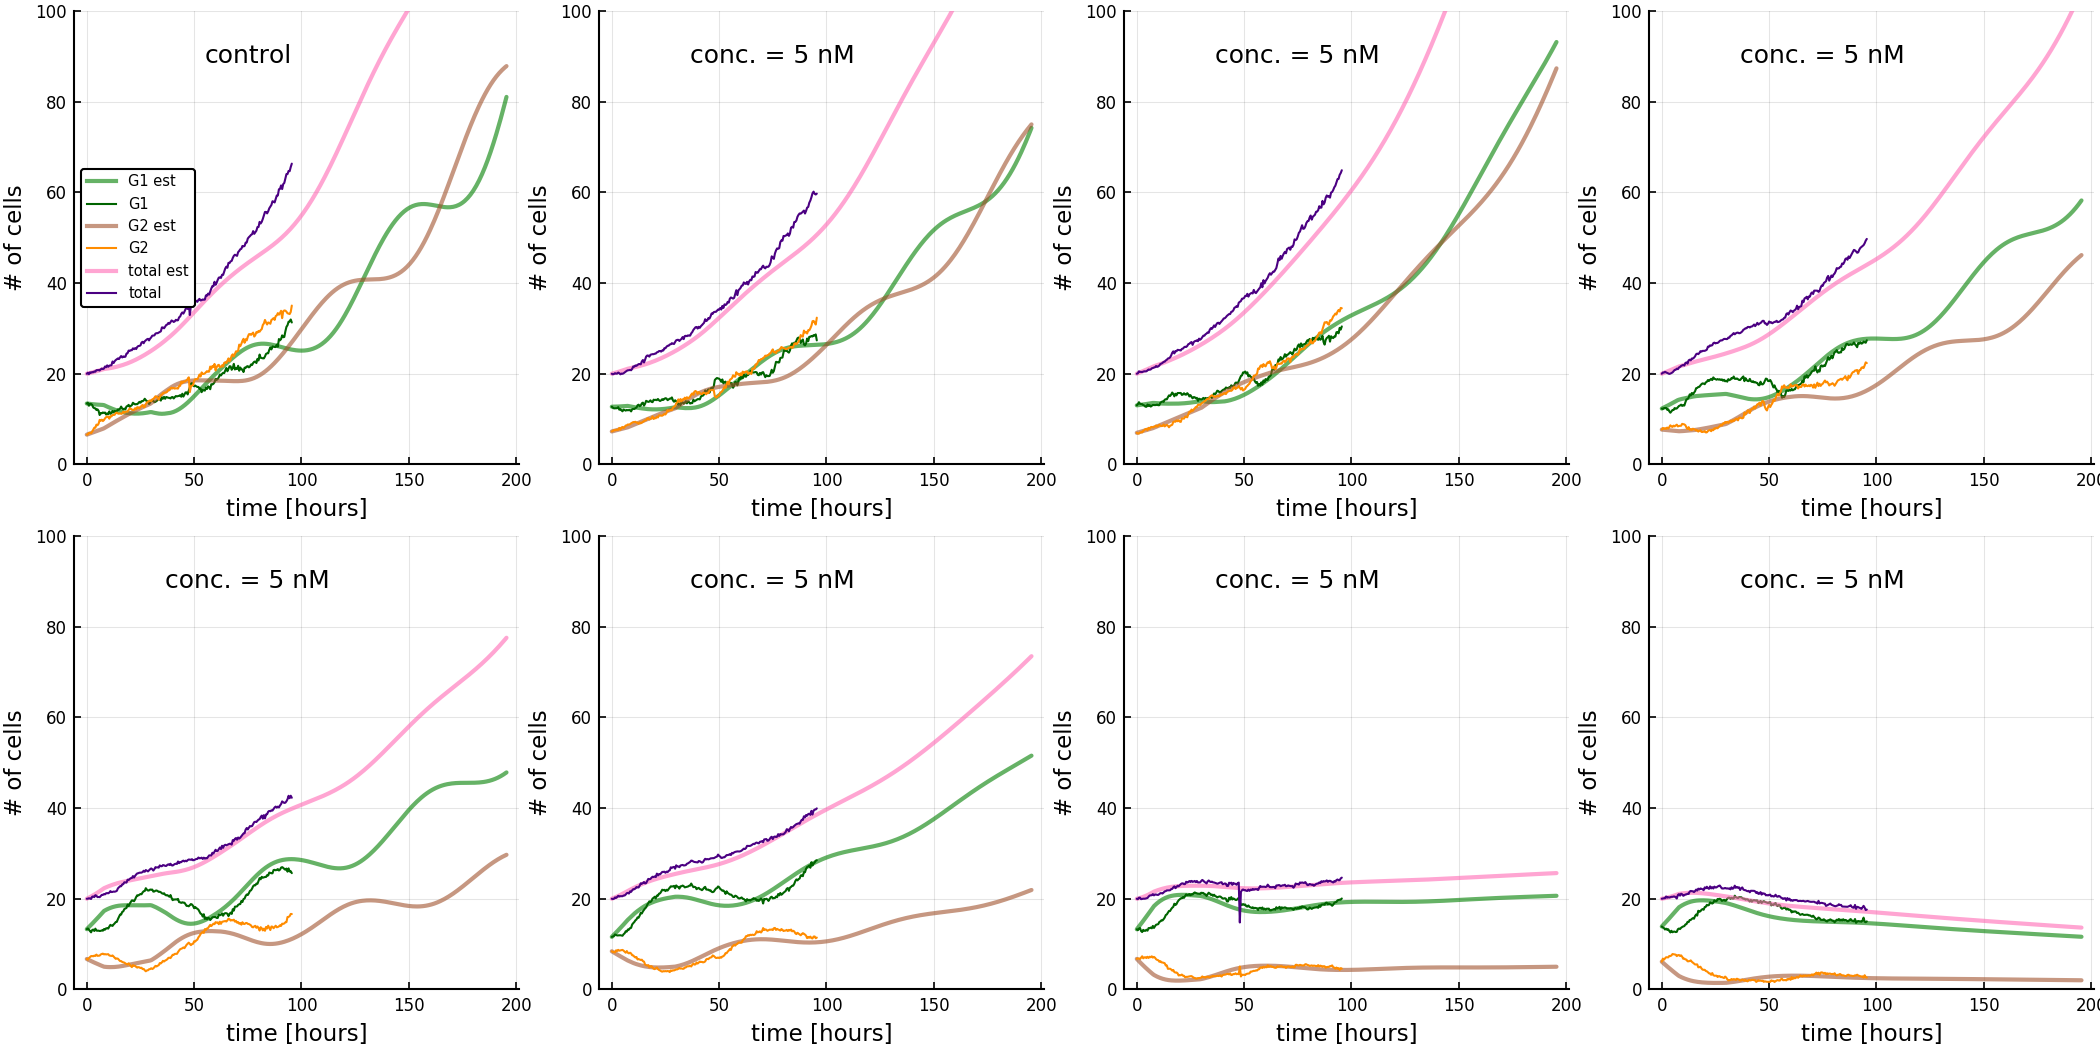

In [4]:
p1 = plotIt(parameters[:, 1], 1, "control", :left)
p2 = plotIt(parameters[:, 2], 2, "conc. = 5 nM", false)
p3 = plotIt(parameters[:, 3], 3, "conc. = 5 nM", false)
p4 = plotIt(parameters[:, 4], 4, "conc. = 5 nM", false)
p5 = plotIt(parameters[:, 5], 5, "conc. = 5 nM", false)
p6 = plotIt(parameters[:, 6], 6, "conc. = 5 nM", false)
p7 = plotIt(parameters[:, 7], 7, "conc. = 5 nM", false)
p8 = plotIt(parameters[:, 8], 8, "conc. = 5 nM", false)
plot(p1, p2, p3, p4, p5, p6, p7, p8, layout = (2,4))
plot!(size = (1400, 700), dpi = 150)
ylims!((0.0, 100.0))
